In [191]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Display the data table for preview
rawdata = pd.merge(city_data,ride_data,how="outer",on = "city")

In [192]:
# Obtain the x and y coordinates for each of the three city types
urban = rawdata.loc[rawdata["type"]=="Urban"]
suburban = rawdata.loc[rawdata["type"]=="Suburban"]
rural = rawdata.loc[rawdata["type"]=="Rural"]
rural.head()

# Calculate rides and number of drivers per city by city type
rides_drivers_per_urban_city = urban.groupby(["city","driver_count"])["ride_id"].count()
rides_drivers_per_suburban_city = suburban.groupby(["city","driver_count"])["ride_id"].count()
rides_drivers_per_rural_city = rural.groupby(["city","driver_count"])["ride_id"].count()

# Calculate average fare per ride per city type
avg_fare_per_urban_city = urban.groupby(["city"])["fare","driver_count"].mean()
avg_fare_per_suburban_city = suburban.groupby(["city"])["fare","driver_count"].mean()
avg_fare_per_rural_city = rural.groupby(["city"])["fare","driver_count"].mean()

# Merge dfs and rename driver count column
urban_rides = pd.merge(rides_drivers_per_urban_city, avg_fare_per_urban_city, on="city")
urban_rides = urban_rides.rename(columns={"ride_id":"total_rides","fare":"average_fare","driver_count":"total_drivers"})

suburban_rides = pd.merge(rides_drivers_per_suburban_city, avg_fare_per_suburban_city, on="city")
suburban_rides = suburban_rides.rename(columns={"ride_id":"total_rides","fare":"average_fare","driver_count":"total_drivers"})

rural_rides = pd.merge(rides_drivers_per_rural_city, avg_fare_per_rural_city, on="city")
rural_rides = rural_rides.rename(columns={"ride_id":"total_rides","fare":"average_fare","driver_count":"total_drivers"})

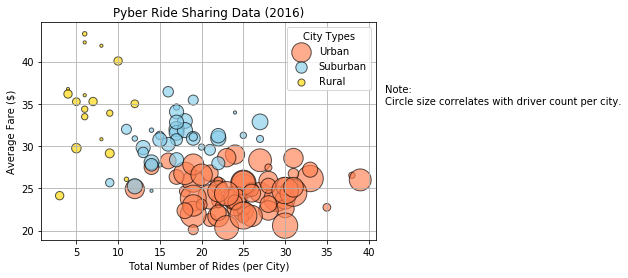

In [193]:
# Build the scatter plots for each city types

plt.scatter(urban_rides["total_rides"], urban_rides["average_fare"],s=(urban_rides["total_drivers"])*10, color="coral", 
            alpha=.65, edgecolor="black", linewidth = 1,label = "Urban")
plt.scatter(suburban_rides["total_rides"], suburban_rides["average_fare"],s=(suburban_rides["total_drivers"])*10, color="SkyBlue", 
            alpha=.65, edgecolor="black", linewidth = 1, label = "Suburban")
plt.scatter(rural_rides["total_rides"], rural_rides["average_fare"],s=(rural_rides["total_drivers"])*10, color="gold", 
            alpha=.65, edgecolor="black", linewidth = 1, label = "Rural")

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare ($)")
plt.legend(title="City Types")
plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.", fontsize=10)
plt.grid(True)

# Save Figure
plt.savefig("pyber_ride_share.png")


'''
% of Total Fares by City Type
% of Total Rides by City Type
% of Total Drivers by City Type
'''

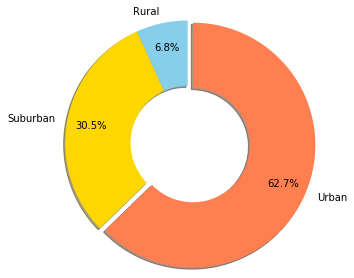

In [194]:
#% of Total Fares by City Type
total_fares_by_type = rawdata.groupby(["type"])["fare"].sum().reset_index()

total_fares = rawdata["fare"].sum()

total_fares_by_type["percent_of_total_fares"] = ((total_fares_by_type.fare / total_fares)*100)

plt.pie(total_fares_by_type["percent_of_total_fares"],labels=total_fares_by_type["type"],wedgeprops = dict(width=0.8),
        colors = ["SkyBlue", "gold", "coral"], shadow = True, autopct='%1.1f%%',startangle=90,explode=(0,0,.07), 
        radius = 1.5, pctdistance=.8)

# Save Figure
plt.tight_layout()
plt.savefig("pyber_percent_fares.png")

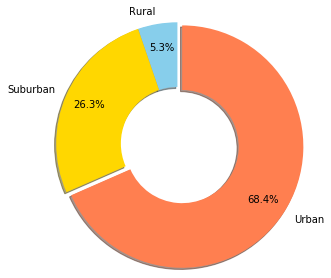

In [195]:
# % of Total Rides by City Type
total_rides_by_type = rawdata.groupby(["type"])["ride_id"].count().reset_index()

total_rides = rawdata["ride_id"].count()

total_rides_by_type["percent_of_total_rides"] = ((total_rides_by_type.ride_id / total_rides)*100)

plt.pie(total_rides_by_type["percent_of_total_rides"],labels=total_rides_by_type["type"],wedgeprops = dict(width=0.8),
        colors = ["SkyBlue", "gold", "coral"], shadow = True, autopct='%1.1f%%',startangle=90,explode=(0,0,.07), 
        radius = 1.5, pctdistance=.8)

# Save Figure
plt.tight_layout()
plt.savefig("pyber_percent_rides.png")

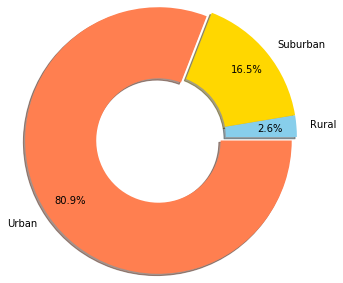

In [196]:
# % of Total Drivers by City Type
ruraldrivers = rawdata.loc[rawdata["type"] == "Rural"]
ruraldrivers_by_driver_count = ruraldrivers.groupby(ruraldrivers["city"])["driver_count"].mean().reset_index()
ruraldrivers_by_driver_count
totalruraldrivers = ruraldrivers_by_driver_count["driver_count"].sum()

urbandrivers = rawdata.loc[rawdata["type"] == "Urban"]
urbandrivers_by_driver_count = urbandrivers.groupby(urbandrivers["city"])["driver_count"].mean().reset_index()
urbandrivers_by_driver_count
totalurbandrivers = urbandrivers_by_driver_count["driver_count"].sum()

suburbandrivers = rawdata.loc[rawdata["type"] == "Suburban"]
suburbandrivers_by_driver_count = suburbandrivers.groupby(suburbandrivers["city"])["driver_count"].mean().reset_index()
suburbandrivers_by_driver_count
totalsuburbandrivers = suburbandrivers_by_driver_count["driver_count"].sum()

alldrivers = totalruraldrivers + totalsuburbandrivers + totalurbandrivers

percent_rural_drivers = (totalruraldrivers / alldrivers)*100
percent_urban_drivers = (totalurbandrivers / alldrivers)*100
percent_suburban_drivers = (totalsuburbandrivers / alldrivers)*100
percents = [percent_rural_drivers,percent_suburban_drivers,percent_urban_drivers]

plt.pie(percents,labels=total_fares_by_type["type"],wedgeprops = dict(width=0.8),
        colors = ["SkyBlue", "gold", "coral"], shadow = True, autopct='%1.1f%%',startangle=0,explode=(0,0,.07),
        radius = 1.5, pctdistance=.8)

# Save Figure
plt.tight_layout()
plt.savefig("pyber_percent_drivers.png")
